# Assignment 3

### Group 11  
Michael Hüppe, Leon Korkmaz

## Task 2: Line fitting with RANSAC

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.filters import sobel_h
from skimage.transform import rotate
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

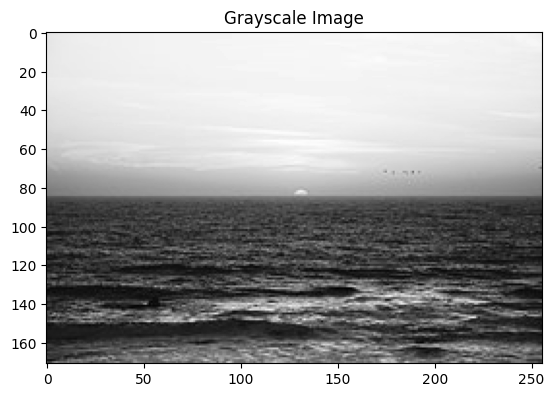

In [ ]:
image_path = "yellow_horizon.jpg"
image = io.imread(image_path)
gray_image = color.rgb2gray(image)

# Plot grayscale image
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.show()

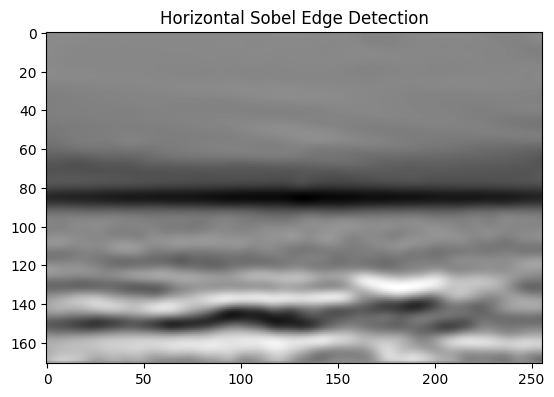

In [8]:
# Smooth the image first to reduce noise
smoothed_image = filters.gaussian(gray_image, sigma=4)

# Apply the Sobel filter for horizontal edge detection
horizontal_gradient = sobel_h(smoothed_image)

# Plot the horizontal gradient
plt.title("Horizontal Sobel Edge Detection")
plt.imshow(horizontal_gradient, cmap='gray')
plt.show()

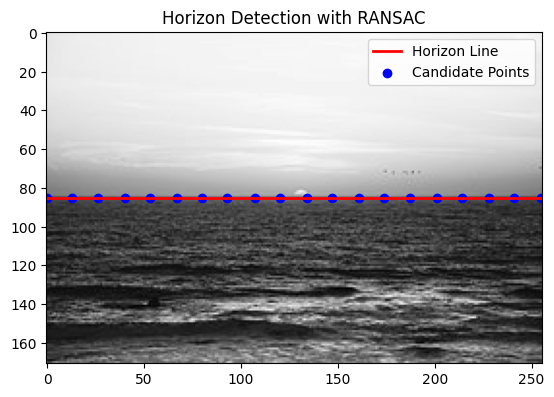

In [9]:
# Find 20 equidistant vertical lines and minimum gradient points
height, width = horizontal_gradient.shape
x_coords = np.linspace(0, width - 1, 20, dtype=int)
y_coords = [np.argmin(horizontal_gradient[:, x]) for x in x_coords]

# Candidate points for RANSAC
candidate_points = np.column_stack((x_coords, y_coords))

# Apply RANSAC for line fitting
X = candidate_points[:, 0].reshape(-1, 1)
y = candidate_points[:, 1]

ransac = RANSACRegressor(LinearRegression(), min_samples=3, residual_threshold=3)
ransac.fit(X, y)

# Extract the line parameters
line_x = np.arange(0, width, 1).reshape(-1, 1)
line_y = ransac.predict(line_x)

# Plot the original image with the detected horizon
plt.title("Horizon Detection with RANSAC")
plt.imshow(gray_image, cmap='gray')
plt.plot(line_x, line_y, color='red', linewidth=2, label='Horizon Line')
plt.scatter(x_coords, y_coords, color='blue', label='Candidate Points')
plt.legend()
plt.show()

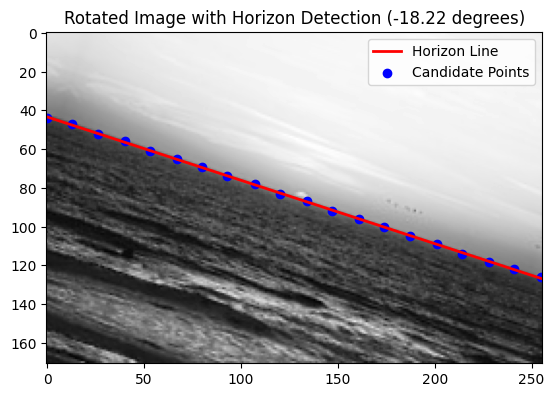

In [10]:
# Rotate the image randomly and test horizon detection
rotation_angle = np.random.uniform(-30, 30) 
rotated_image = rotate(gray_image, angle=rotation_angle, mode="reflect")

# Smooth and detect edges in rotated image
rotated_smoothed = filters.gaussian(rotated_image, sigma=4)
rotated_gradient = sobel_h(rotated_smoothed)

# Find new candidate points for RANSAC
rotated_y_coords = [np.argmin(rotated_gradient[:, x]) for x in x_coords]
rotated_candidate_points = np.column_stack((x_coords, rotated_y_coords))

# Apply RANSAC to the rotated image
rotated_X = rotated_candidate_points[:, 0].reshape(-1, 1)
rotated_y = rotated_candidate_points[:, 1]

ransac.fit(rotated_X, rotated_y)
rotated_line_y = ransac.predict(line_x)

# Plot the rotated image with the detected horizon
plt.title(f"Rotated Image with Horizon Detection ({rotation_angle:.2f} degrees)")
plt.imshow(rotated_image, cmap='gray')
plt.plot(line_x, rotated_line_y, color='red', linewidth=2, label='Horizon Line')
plt.scatter(x_coords, rotated_y_coords, color='blue', label='Candidate Points')
plt.legend()
plt.show()
